In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [6]:
df.shape

(891, 12)

In [7]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [8]:
# it is classification data set

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# if there null values some columns

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [13]:
df.drop(columns=['Cabin'],inplace=True)

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# it data set some columns categorical so convert numerical use encoding

In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
df['Sex'] = le.fit_transform(df['Sex'])

In [20]:
df['Name'] = le.fit_transform(df['Name'])

In [21]:
df['Ticket'] = le.fit_transform(df['Ticket'])

In [22]:
df['Embarked'] = le.fit_transform(df['Embarked'])

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2


In [24]:
df.shape

(891, 11)

<AxesSubplot:xlabel='Survived', ylabel='count'>

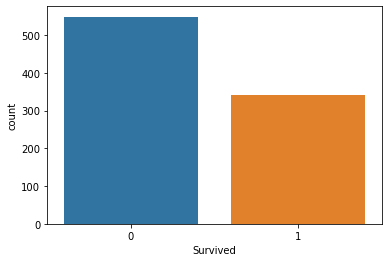

In [25]:
sns.countplot(df['Survived'])

In [26]:
# if calss target variable imbalance

In [27]:
!pip install imbalanced-learn==0.6.0

In [28]:
!pip install scikit-learn==0.22.1

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.




  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


In [29]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [30]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y = SM.fit_resample(x,y)

In [32]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

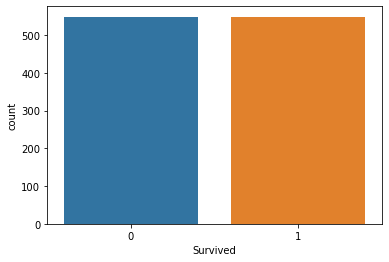

In [33]:
sns.countplot(y)

In [34]:
# so target variable is class balanced so proceed data set

In [35]:
# data visluzation 

In [36]:
# bivariate analysis used scatter plot some columns

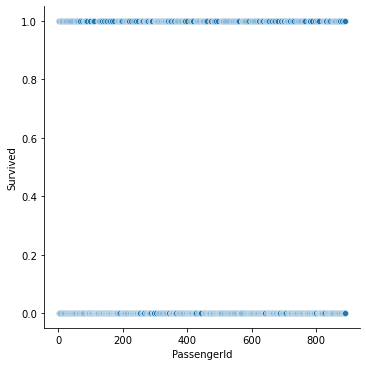

In [37]:
sns.relplot(data=df,x='PassengerId',y='Survived')
plt.show()

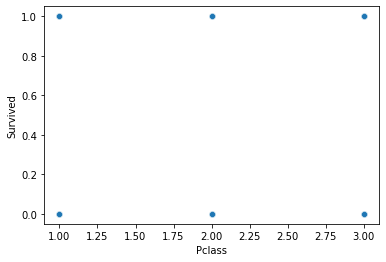

In [38]:
sns.scatterplot(data=df,x='Pclass',y='Survived')
plt.show()

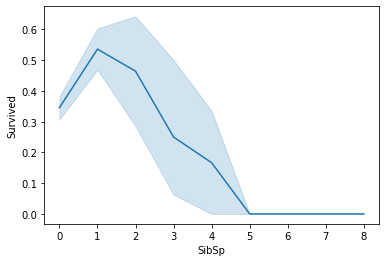

In [39]:
sns.lineplot(data=df,x='SibSp',y='Survived')
plt.show()

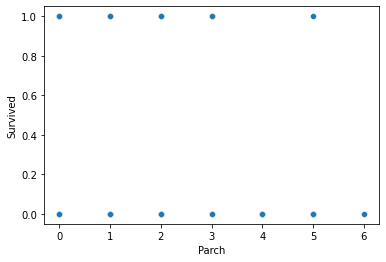

In [40]:
sns.scatterplot(data=df,x='Parch',y='Survived')
plt.show()

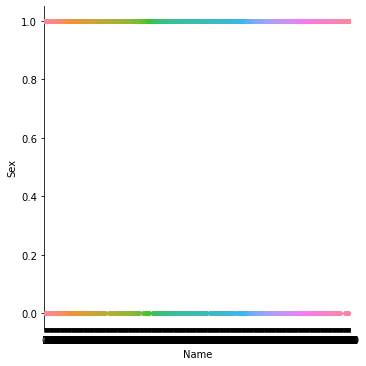

In [41]:
sns.catplot(data=df,x='Name',y='Sex')
plt.show()

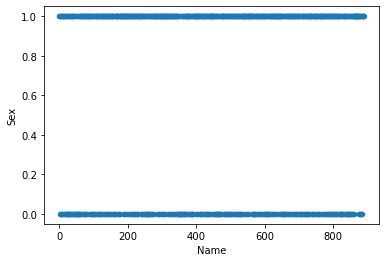

In [42]:
df.plot(kind='scatter',x='Name',y='Sex',);
plt.show()

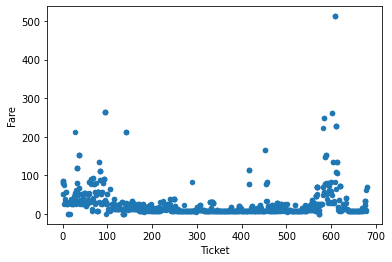

In [43]:
df.plot(kind='scatter',x='Ticket',y='Fare');
plt.show()

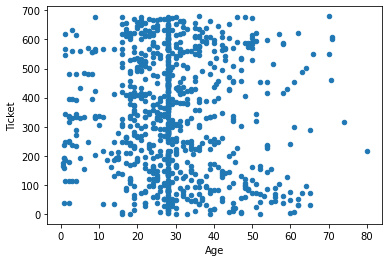

In [44]:
df.plot(kind='scatter',x='Age',y='Ticket');
plt.show()

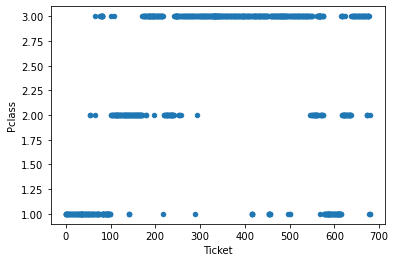

In [45]:
df.plot(kind='scatter',x='Ticket',y='Pclass');
plt.show()

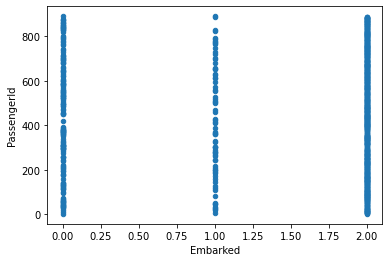

In [46]:
df.plot(kind='scatter',x='Embarked',y='PassengerId');
plt.show()

In [47]:
#multi varaite heat map

[]

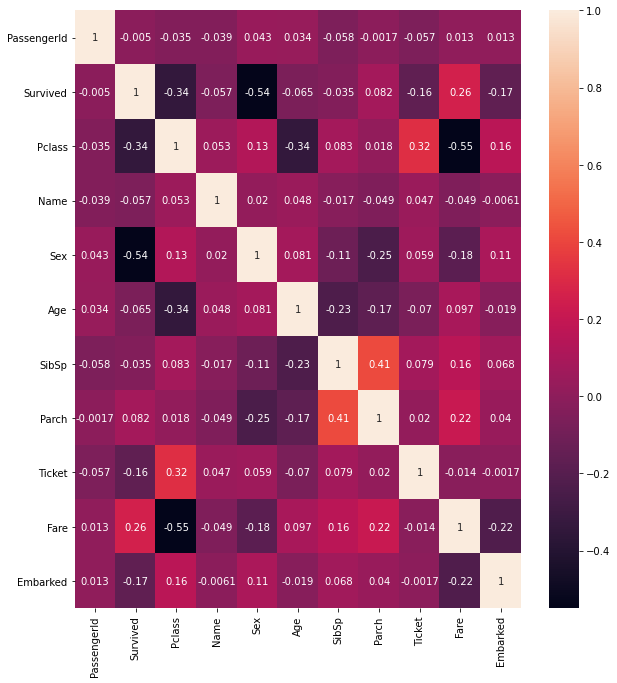

In [48]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

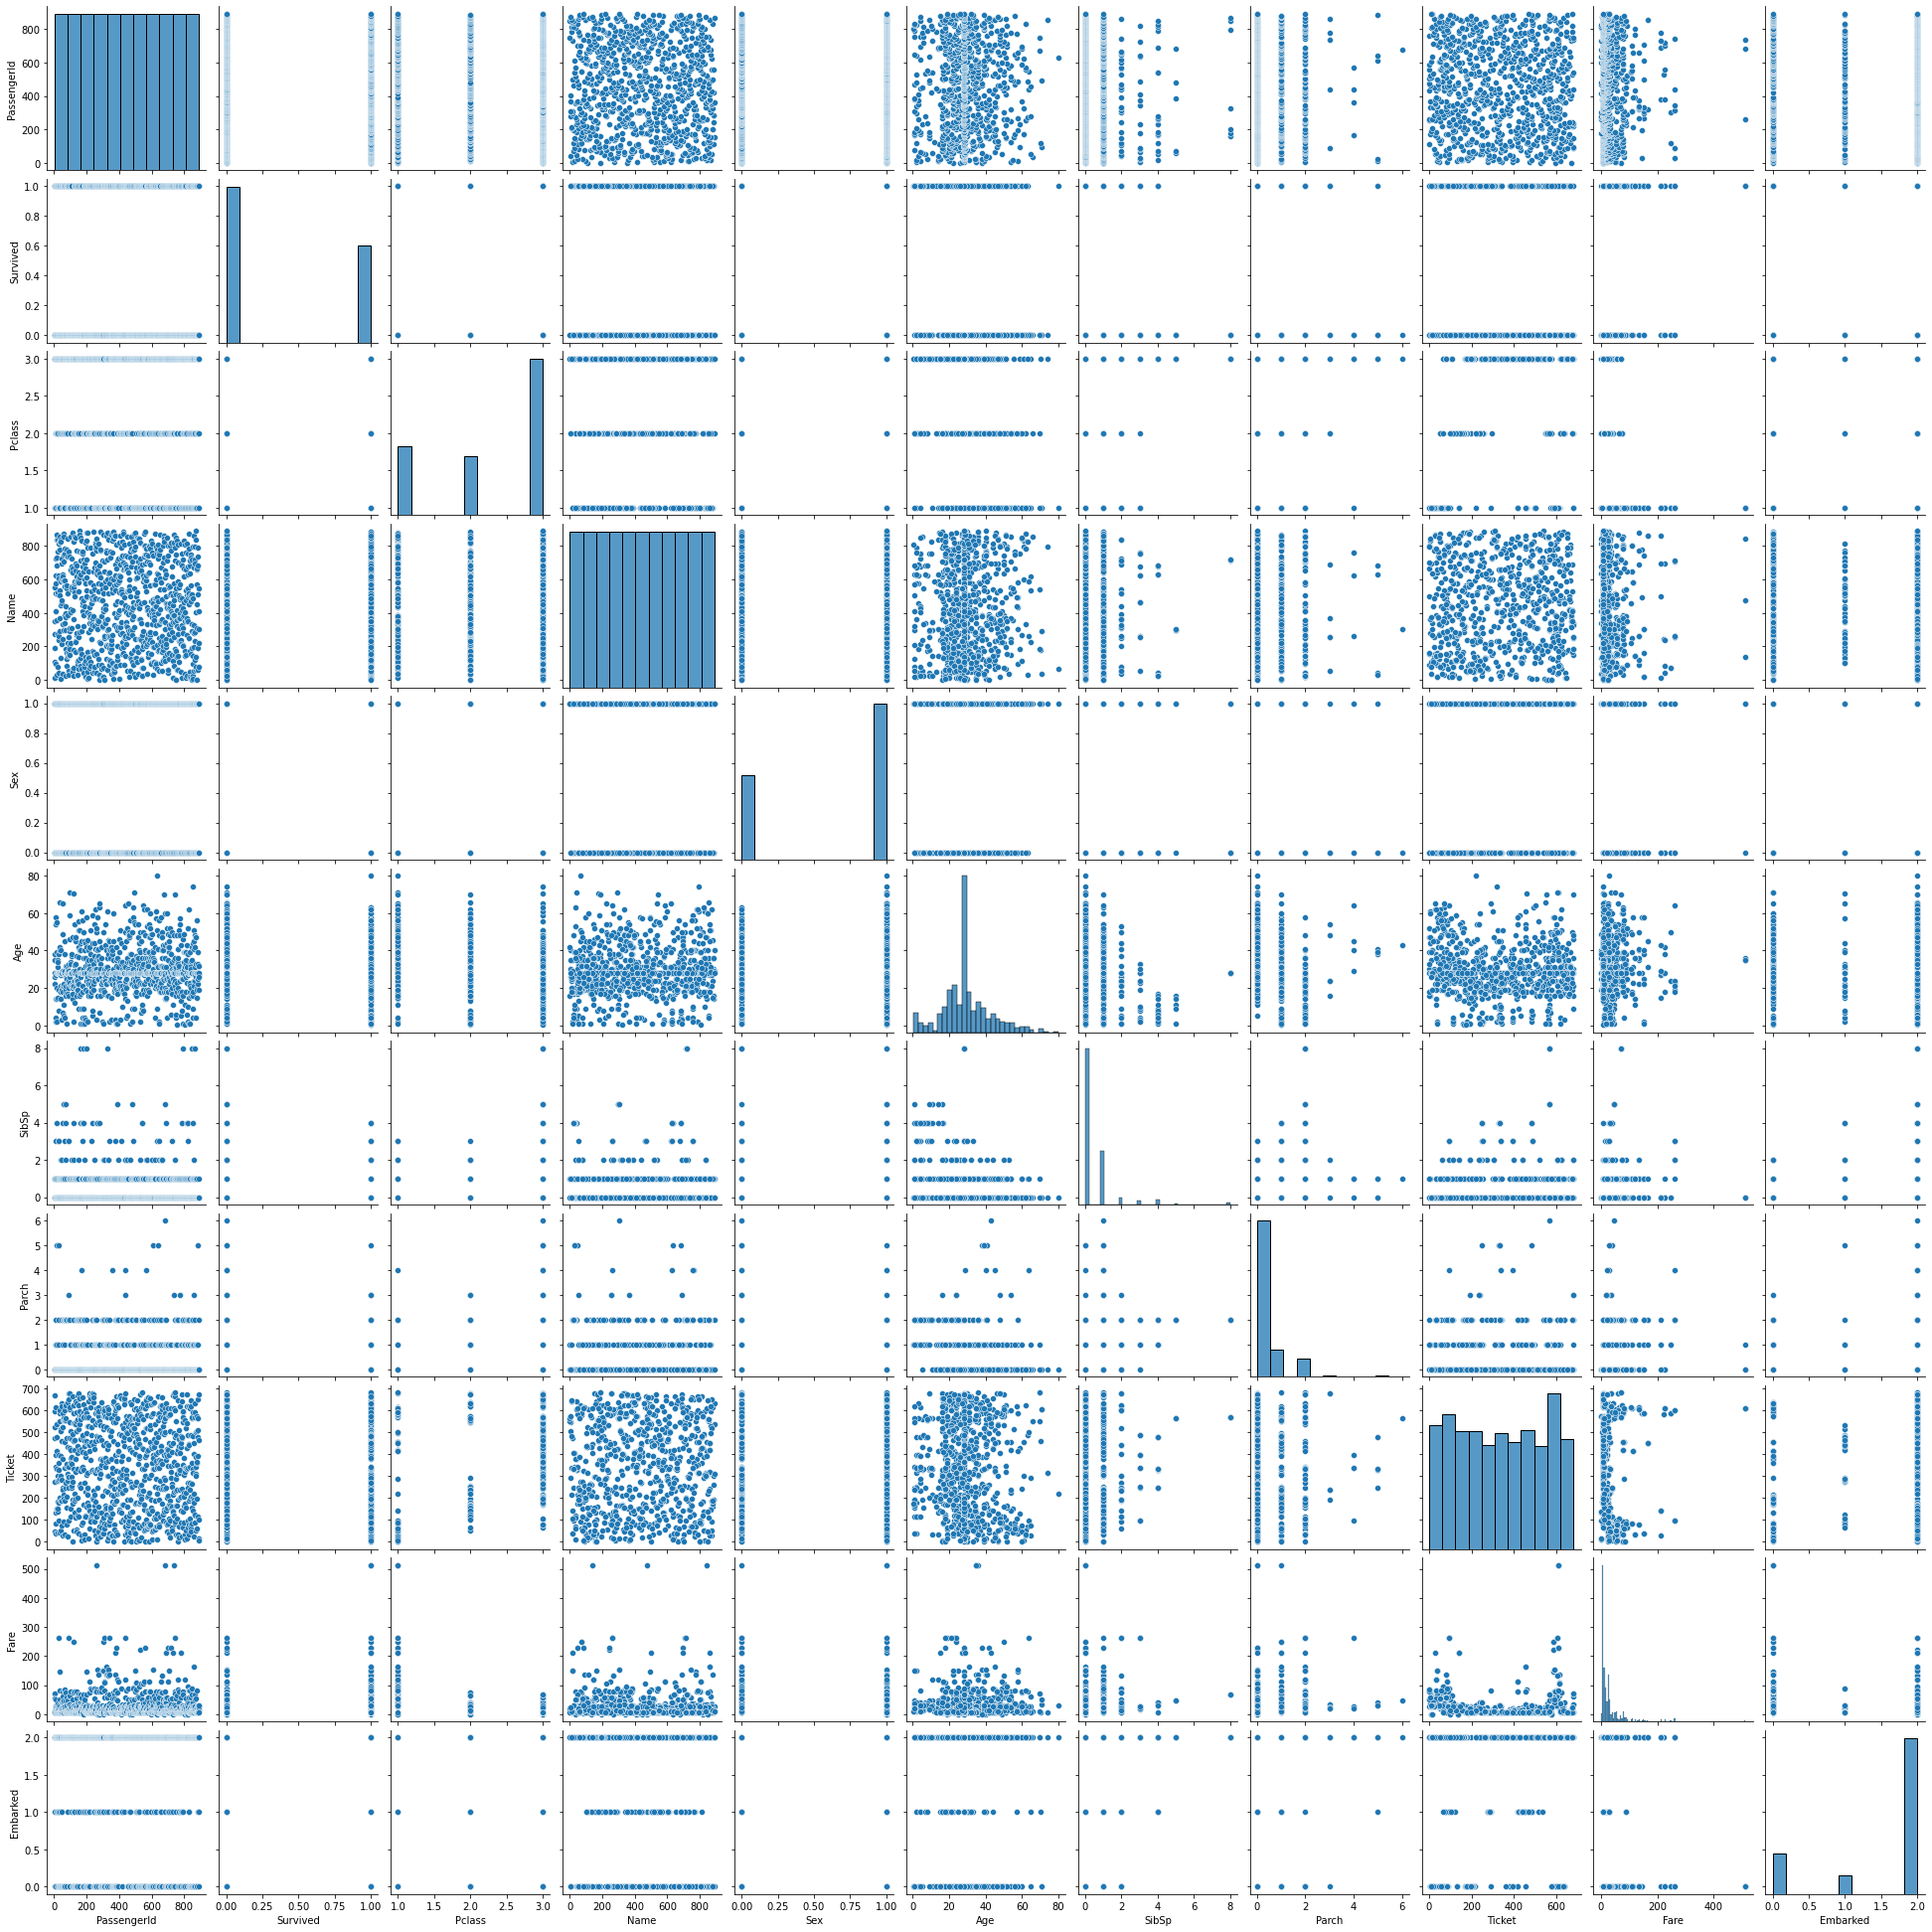

In [49]:
sns.pairplot(df)

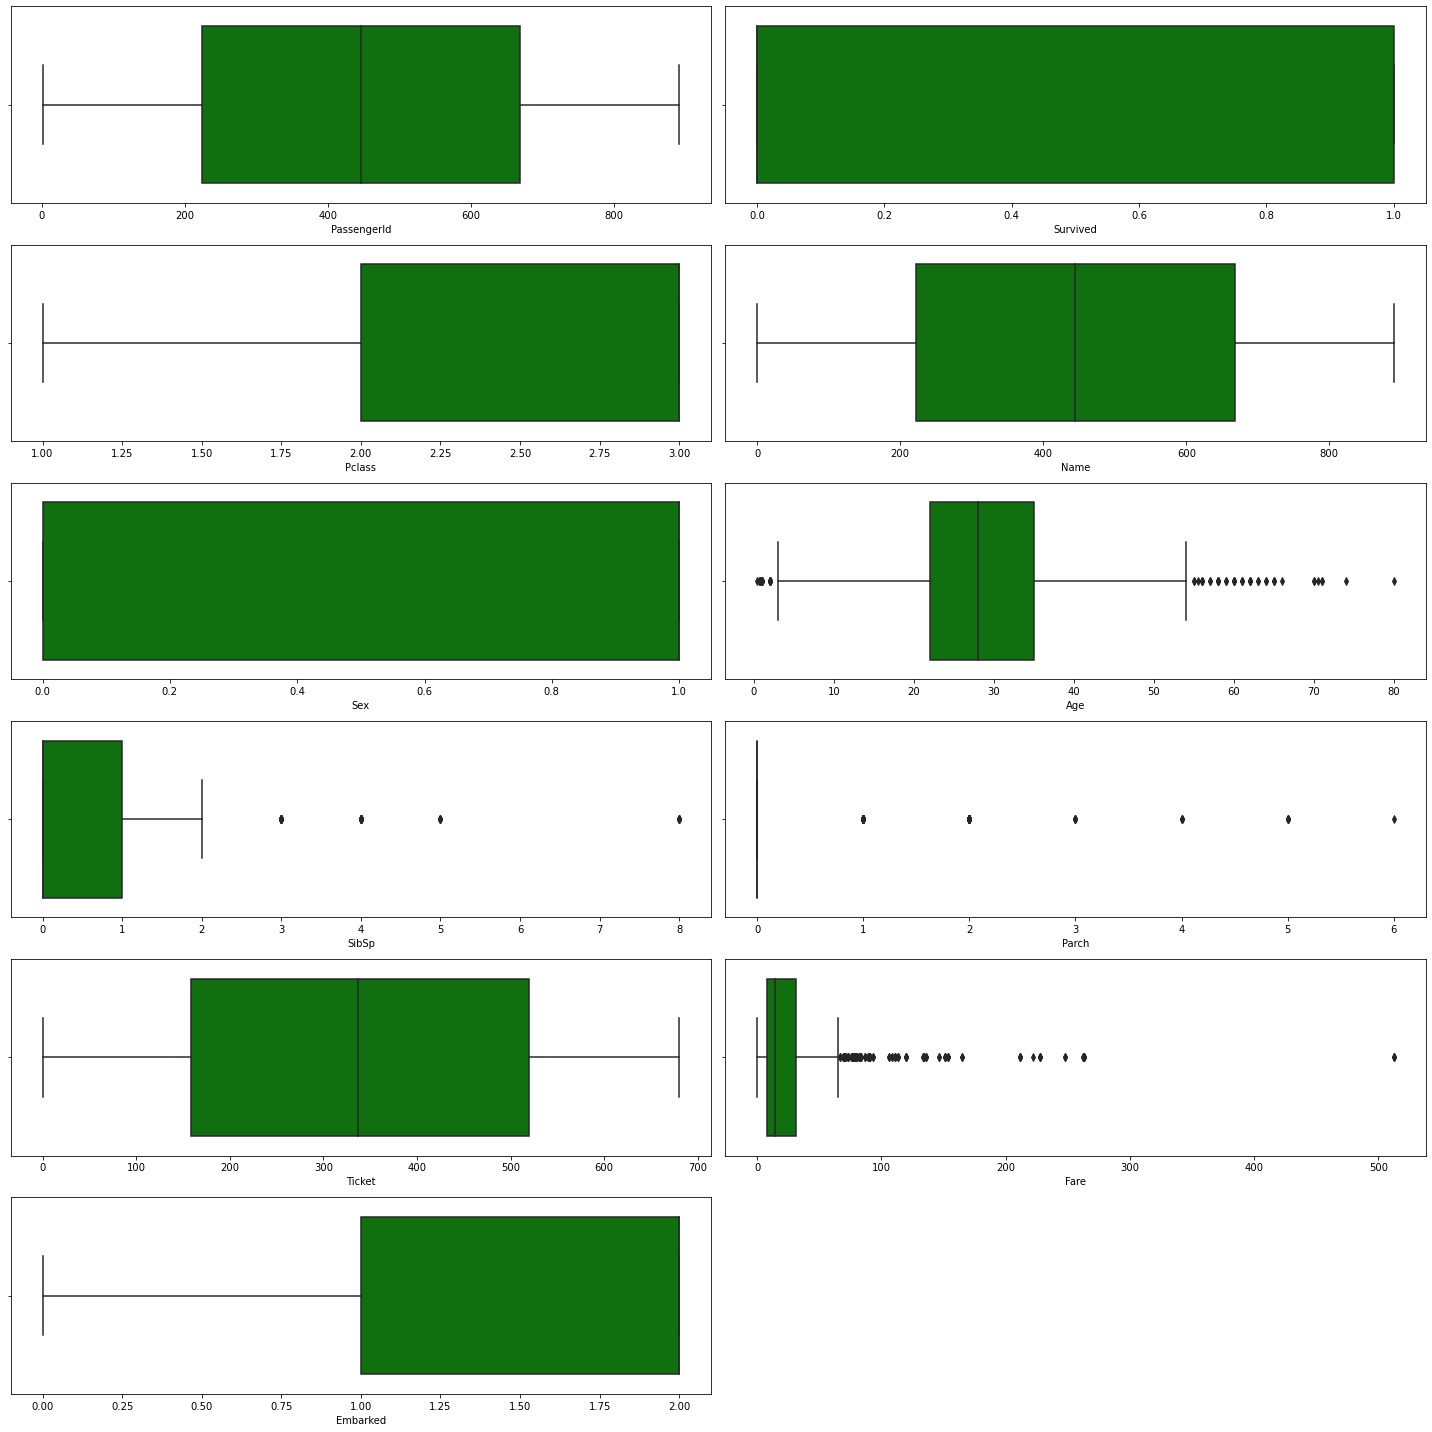

In [50]:
collist=df.columns.values
ncol=2
nrows=6
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [52]:
dfContCols=df[["Age","Fare"]]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [54]:
from scipy.stats import zscore
z = np.abs(zscore(dfContCols))
df_new=df[(z<3).all(axis=1)]

In [55]:
df_new.shape

(864, 11)

In [56]:
df.shape

(891, 11)

In [57]:
# data loss

In [101]:
data_loss=((891-864)/891)*100

In [102]:
data_loss = 3.03

In [103]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [104]:
df.shape

(891, 11)

In [105]:
df_new1.shape

(577, 11)

In [106]:
data_loss = ((891-825)/891)*100

In [107]:
data_loss = 7.40

In [108]:
# consider z score data loss less

In [109]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [110]:
x.skew()

PassengerId   -0.010539
Pclass        -0.400350
Name           0.029736
Sex           -0.190551
Age            0.528784
SibSp          3.951033
Parch          2.943547
Ticket         0.023165
Fare           4.508746
Embarked      -1.047622
dtype: float64

In [111]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [112]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [113]:
df_new.skew()

PassengerId   -0.282456
Pclass        -0.294231
Name          -0.266847
Sex           -0.190551
Age            0.082919
SibSp          0.949472
Parch          1.371556
Ticket        -0.289630
Fare          -0.026044
Embarked      -0.837707
dtype: float64

In [114]:
# so skewness removed some columns

In [115]:
# data cleaning complete so proceed ml algorthims

In [116]:
# model bulding

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [119]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8575757575757575 on Random_state 92


In [120]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30,random_state=maxRS)

In [121]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()


In [122]:
# logistic regression

In [123]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

accuracy_score 0.8515151515151516
confusion_matrix [[147  21]
 [ 28 134]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.86      0.83      0.85       162

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



In [124]:
# decision tree classifier

In [125]:
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusuon_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8363636363636363
confusuon_matrix [[145  23]
 [ 31 131]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.85      0.81      0.83       162

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [126]:
# random forest

In [127]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.8939393939393939
confusion_matrix [[159   9]
 [ 26 136]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.95      0.90       168
           1       0.94      0.84      0.89       162

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330



In [128]:
# gradient boosting

In [129]:
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

accuracy_score 0.9
confusion_matrix [[158  10]
 [ 23 139]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.94      0.91       168
           1       0.93      0.86      0.89       162

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [130]:
#accuracy_model is random forest

In [131]:
# so cv used 

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7860523038605229


In [134]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.5721336654213366


In [135]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.6767247820672477


In [136]:
print(cross_val_score(gb,x,y,cv=5).mean())

0.4408675799086758


In [137]:
# accuracy-cv is best model is decision tree classifier

In [138]:
# hyper parameter tuning

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = {'criterion':['entropy','gini'],
              'max_depth':[4,2,8,3,9,16,19],
              'min_samples_leaf':[5,2,20,28,21],
              'max_leaf_nodes':[4,7,8,2,9,6]}

grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 2, 8, 3, 9, 16, 19],
                         'max_leaf_nodes': [4, 7, 8, 2, 9, 6],
                         'min_samples_leaf': [5, 2, 20, 28, 21]})

In [141]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 5}

In [142]:
Final_mod = DecisionTreeClassifier(criterion='gini',max_depth=9,max_leaf_nodes=9,min_samples_leaf=2)
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

86.06060606060606


In [143]:
# save the model

In [100]:
import joblib
joblib.dump(Final_mod,'Finalmodle.pkl')

['Finalmodle.pkl']